In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [2]:
myntra  = pd.read_excel(r"C:\Users\Suchana\Desktop\temp-myntra\men\myntra-MEN.xlsx")

In [3]:

myntra.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Men Slim Fit Shirt,Rs.349,HIGHLANDER,72% OFF,4.2,17.1k
1,Men Slim Fit Casual Sustainable Shirt,Rs.559,Mast & Harbour,Rs. 1540 OFF,4.3,20.6k
2,Slim Fit Cotton Casual Shirt,Rs.391,HIGHLANDER,71% OFF,4.2,1.4k
3,Slim Fit Casual Shirt,Rs.1122,THE BEAR HOUSE,55% OFF,4.3,5.8k
4,Men Slim Fit Casual Shirt,Rs.350,HIGHLANDER,73% OFF,4.1,5.6k


### Removing the null values

In [4]:
myntra.shape

(262006, 6)

In [5]:
myntra['Discount'].isnull().sum()

50051

In [6]:
myntra.dropna(inplace=True)

In [7]:
myntra['Discount'].isnull().sum()

0

In [8]:
myntra.shape

(119314, 6)

Here we will divide the dataset into two dataframes i) absolute_discount, which will contain the absolute discount values. and ii) myntra1 which will contain the discount values.
We will  transform the absolute value of discount to it's discounted form, and concatenate the two dataframes to create the final dataset.

In [9]:
myntra1 = myntra[~myntra['Discount'].str.contains('Rs')]

In [10]:
myntra1.shape

(113318, 6)

In [11]:
absolute_discount= myntra[myntra['Discount'].str.contains('Rs')]
absolute_discount

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
1,Men Slim Fit Casual Sustainable Shirt,Rs.559,Mast & Harbour,Rs. 1540 OFF,4.3,20.6k
12,Printed Slim Fit Casual Shirt,Rs.749,HERE&NOW,Rs. 1250 OFF,4.2,3k
17,Slim Fit Cotton Casual Shirt,Rs.749,Moda Rapido,Rs. 1550 OFF,4.0,674
28,Slim Fit Cotton Casual Shirt,Rs.849,HERE&NOW,Rs. 1450 OFF,4.1,4.3k
29,Slim Fit Casual Shirt,Rs.649,HERE&NOW,Rs. 1250 OFF,4.2,14.9k
...,...,...,...,...,...,...
261452,Pack Of 3 Innerwear Vests,Rs.1399,Heelium,Rs. 2500 OFF,4.3,21
261714,Round Neck Gym Vest,Rs.399,SPORT SUN,Rs. 200 OFF,3.5,6
261715,Round Neck Gym Vest,Rs.399,SPORT SUN,Rs. 300 OFF,3.9,15
261767,Men Solid Innerwear Vest,Rs.499,one8 by Virat Kohli,Rs. 132 OFF,4.1,144


In [12]:
# Remove 'Rs.' from the 'Product Price' column
absolute_discount.loc[:, 'Product Price'] = absolute_discount['Product Price'].str.replace('Rs.', '')

# Remove 'Rs.' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('Rs.', '')

# Remove 'OFF' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('OFF', '')

In [13]:
absolute_discount[['Discount','Product Price']]

,Discount,Product Price
1,1540,559
12,1250,749
17,1550,749
28,1450,849
29,1250,649
...,...,...
261452,2500,1399
261714,200,399
261715,300,399
261767,132,499


#### Calculating the actual price of the product

In [14]:
val1= [int(i) for i in absolute_discount['Product Price'].values]
val2 = [int(i) for i in absolute_discount['Discount'].values]
val3= []
#len(val1)
len(val2)
for i in range(len(val1)):
    val3.append(val1[i] + val2[i]) 
print(val3)

[2099, 1999, 2299, 2299, 1899, 1399, 2299, 2299, 1999, 1999, 2299, 1299, 1999, 2199, 1999, 1499, 1899, 2399, 1899, 2098, 2399, 2099, 2399, 1999, 2280, 1899, 2299, 2299, 1299, 2280, 1999, 1399, 2299, 1999, 2299, 1299, 2399, 2399, 2099, 1899, 1699, 1399, 1799, 1999, 2199, 2499, 1999, 1799, 2199, 1899, 2280, 2499, 1899, 1849, 1599, 2099, 2299, 1799, 2299, 2998, 1799, 1999, 2199, 2499, 1799, 1999, 2399, 1349, 2499, 1999, 1849, 1899, 2199, 2399, 2299, 1849, 1799, 3199, 1799, 2199, 2299, 1499, 1699, 1899, 2499, 2199, 2099, 1799, 2199, 2199, 2099, 1799, 1899, 2099, 1899, 1899, 2399, 1899, 1849, 2399, 2199, 2999, 1699, 2199, 2499, 1799, 1799, 2199, 1999, 2399, 1199, 1999, 2399, 1799, 1999, 1899, 2399, 2199, 2399, 1899, 1899, 2199, 1999, 1799, 1849, 1699, 2199, 1849, 1199, 1899, 1799, 1899, 1799, 2099, 2599, 1899, 2199, 1899, 2199, 1799, 2099, 2149, 2499, 1999, 1999, 2999, 2299, 2799, 2099, 1799, 2699, 1899, 1799, 1499, 1599, 1999, 1899, 1999, 1799, 1799, 1999, 2099, 2399, 1849, 1799, 2199, 299

In [15]:
len(val3)

5996

In [16]:
absolute_discount['Actual Price']= val3 

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\393552973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Actual Price']= val3


In [17]:
absolute_discount.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Actual Price
1,Men Slim Fit Casual Sustainable Shirt,559,Mast & Harbour,1540,4.3,20.6k,2099
12,Printed Slim Fit Casual Shirt,749,HERE&NOW,1250,4.2,3k,1999
17,Slim Fit Cotton Casual Shirt,749,Moda Rapido,1550,4.0,674,2299
28,Slim Fit Cotton Casual Shirt,849,HERE&NOW,1450,4.1,4.3k,2299
29,Slim Fit Casual Shirt,649,HERE&NOW,1250,4.2,14.9k,1899


####  Calculating the Discount of products from the actual price and storing it in price % column

In [18]:
val1= [int(i) for i in absolute_discount['Discount'].values]
val2 = [int(i) for i in absolute_discount['Actual Price'].values]
val3=[]
for i in range(len(val1)):
    val3.append((val1[i] / val2[i]) *100) 
print(val3)

[73.36827060505003, 62.531265632816414, 67.42061765985211, 63.07090039147455, 65.82411795681938, 17.8699070764832, 65.24575902566333, 65.24575902566333, 60.030015007503756, 60.030015007503756, 67.42061765985211, 26.943802925327176, 60.030015007503756, 59.11778080945884, 60.030015007503756, 60.04002668445631, 65.82411795681938, 62.526052521884125, 52.6592943654555, 50.0, 60.44185077115465, 64.31634111481658, 62.526052521884125, 60.030015007503756, 53.99122807017543, 60.55818852027382, 65.24575902566333, 65.24575902566333, 26.943802925327176, 53.99122807017543, 65.03251625812906, 17.8699070764832, 58.721183123097, 65.03251625812906, 59.76511526750761, 26.943802925327176, 62.526052521884125, 66.69445602334306, 71.46260123868508, 68.45708267509215, 66.21542083578575, 35.7398141529664, 63.035019455252915, 65.03251625812906, 55.934515688949524, 60.024009603841534, 67.53376688344173, 50.0277932184547, 63.665302410186456, 63.191153238546605, 53.99122807017543, 60.024009603841534, 63.1911532385

In [19]:
absolute_discount.loc[:,'price %'] = val3

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\3858670351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.loc[:,'price %'] = val3


In [20]:
absolute_discount.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Actual Price,price %
1,Men Slim Fit Casual Sustainable Shirt,559,Mast & Harbour,1540,4.3,20.6k,2099,73.368271
12,Printed Slim Fit Casual Shirt,749,HERE&NOW,1250,4.2,3k,1999,62.531266
17,Slim Fit Cotton Casual Shirt,749,Moda Rapido,1550,4.0,674,2299,67.420618
28,Slim Fit Cotton Casual Shirt,849,HERE&NOW,1450,4.1,4.3k,2299,63.070900
29,Slim Fit Casual Shirt,649,HERE&NOW,1250,4.2,14.9k,1899,65.824118


In [21]:
absolute_discount.drop(['Discount'], axis=1, inplace=True)
absolute_discount.drop(['Actual Price'], axis=1, inplace=True)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2447155854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Discount'], axis=1, inplace=True)
C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2447155854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Actual Price'], axis=1, inplace=True)


In [22]:
absolute_discount.head(2)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,price %
1,Men Slim Fit Casual Sustainable Shirt,559,Mast & Harbour,4.3,20.6k,73.368271
12,Printed Slim Fit Casual Shirt,749,HERE&NOW,4.2,3k,62.531266


In [23]:
absolute_discount['Discount']= absolute_discount['price %']

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2641971026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount']= absolute_discount['price %']


In [24]:
absolute_discount.drop(['price %'], axis=1, inplace=True)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\549001976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['price %'], axis=1, inplace=True)


In [25]:
absolute_discount.head(3)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
1,Men Slim Fit Casual Sustainable Shirt,559,Mast & Harbour,4.3,20.6k,73.368271
12,Printed Slim Fit Casual Shirt,749,HERE&NOW,4.2,3k,62.531266
17,Slim Fit Cotton Casual Shirt,749,Moda Rapido,4.0,674,67.420618


In [26]:
absolute_discount.Discount

1         73.368271
12        62.531266
17        67.420618
28        63.070900
29        65.824118
            ...    
261452    64.119005
261714    33.388982
261715    42.918455
261767    20.919176
261824    46.697799
Name: Discount, Length: 5996, dtype: float64

In [27]:
# We convert the discount values to integer to obtain the whole numbers
absolute_discount['Discount'] = absolute_discount['Discount'].astype(int)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\3100193220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount'] = absolute_discount['Discount'].astype(int)


In [28]:
absolute_discount.Discount

1         73
12        62
17        67
28        63
29        65
          ..
261452    64
261714    33
261715    42
261767    20
261824    46
Name: Discount, Length: 5996, dtype: int32

In [29]:
absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2584636706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'


In [30]:
absolute_discount.shape

(5996, 6)

In [31]:
absolute_discount.head(10)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
1,Men Slim Fit Casual Sustainable Shirt,559,Mast & Harbour,4.3,20.6k,73% OFF
12,Printed Slim Fit Casual Shirt,749,HERE&NOW,4.2,3k,62% OFF
17,Slim Fit Cotton Casual Shirt,749,Moda Rapido,4.0,674,67% OFF
28,Slim Fit Cotton Casual Shirt,849,HERE&NOW,4.1,4.3k,63% OFF
29,Slim Fit Casual Shirt,649,HERE&NOW,4.2,14.9k,65% OFF
31,Slim Fit Casual Shirt,1149,HIGHLANDER,4.3,2.9k,17% OFF
34,Slim Fit Cotton Casual Shirt,799,Moda Rapido,4.0,687,65% OFF
35,Slim Fit Cotton Casual Shirt,799,HERE&NOW,3.9,202,65% OFF
39,Slim Fit Casual Shirt,799,HERE&NOW,4.1,784,60% OFF
40,Slim Fit Opaque Casual Shirt,799,HERE&NOW,4.2,1.2k,60% OFF


In [32]:
myntra.shape

(119314, 6)

In [33]:
myntra1.shape

(113318, 6)

In [34]:
absolute_discount.shape

(5996, 6)

In [35]:
# Concatenate vertically
result = pd.concat([myntra1, absolute_discount], axis=0)

In [36]:
result.shape # the number of rows remains same as the original myntra dataset.

(119314, 6)

###  Exploratory Data Anlysis on the result dataset.

In [37]:
result.head(2)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Men Slim Fit Shirt,Rs.349,HIGHLANDER,72% OFF,4.2,17.1k
2,Slim Fit Cotton Casual Shirt,Rs.391,HIGHLANDER,71% OFF,4.2,1.4k


In [38]:
result.isnull().sum()  # no null values in the final dataset.

Product Name       0
Product Price      0
Product Brand      0
Discount           0
Product Rating     0
Verified Buyers    0
dtype: int64

In [39]:
result.shape

(119314, 6)

In [40]:
result['Product Price']=result['Product Price'].str.replace('Rs.','')

In [41]:
result['Product Price'].values

array(['349', '391', '1122', ..., '399', '499', '799'], dtype=object)

In [42]:
result['Product Price']=result['Product Price'].astype('float')

In [43]:
result['Product Price'].values

array([ 349.,  391., 1122., ...,  399.,  499.,  799.])

### Creating custom  Price Range for analysis

In [44]:
price_bins = [0, 500, 1000, 1500,2000,2500,3000, float('inf')]
price_labels = ['0-500', '501-1000', '1001-1500','1501-2000' ,'2001-2500','2501-3000','3001+']

# Assign price range categories
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate average rating
avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()

# Group by price range and calculate count of ratings
count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()

# Find the price range with the highest average rating
max_avg_rating = avg_rating_by_price.loc[avg_rating_by_price['Product Rating'].idxmax()]

# Find the price range with the highest count of ratings
max_count_ratings = count_ratings_by_price.loc[count_ratings_by_price['Product Rating'].idxmax()]


result.head()

C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2530613435.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()
C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2530613435.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()


,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range
0,Men Slim Fit Shirt,349.0,HIGHLANDER,72% OFF,4.2,17.1k,0-500
2,Slim Fit Cotton Casual Shirt,391.0,HIGHLANDER,71% OFF,4.2,1.4k,0-500
3,Slim Fit Casual Shirt,1122.0,THE BEAR HOUSE,55% OFF,4.3,5.8k,1001-1500
4,Men Slim Fit Casual Shirt,350.0,HIGHLANDER,73% OFF,4.1,5.6k,0-500
5,Slim Fit Casual Shirt,391.0,HIGHLANDER,72% OFF,4.1,4.5k,0-500


### FIND SUM OF VERIFIED BUYERS(SALES) FOR THE CUSTOM PRICE RANGES

In [45]:
def convert_k_notation(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    return float(value)

# Apply the conversion function to the Verified Buyers column
result['Verified Buyers'] = result['Verified Buyers'].apply(convert_k_notation)


In [46]:
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate the sum of verified buyers
sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_price_range)

Sum of Verified Buyers by Price Range:
  Price Range  Verified Buyers
0       0-500       29950808.0
1    501-1000       18838506.0
2   1001-1500       20444197.0
3   1501-2000        1027105.0
4   2001-2500          85666.0
5   2501-3000          27210.0
6       3001+          59233.0


C:\Users\Suchana\AppData\Local\Temp\ipykernel_24264\2323057440.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()


### INFLUENCE OF PRICE RANGE ON SUM OF VERIFIED BUYERS(SALES)

In [47]:
sum_verified_by_price_range.head()
#sum_verified_by_price_range is  a dataframe which contains sum of verified buyers with respect to price range

,Price Range,Verified Buyers
0,0-500,29950808.0
1,501-1000,18838506.0
2,1001-1500,20444197.0
3,1501-2000,1027105.0
4,2001-2500,85666.0


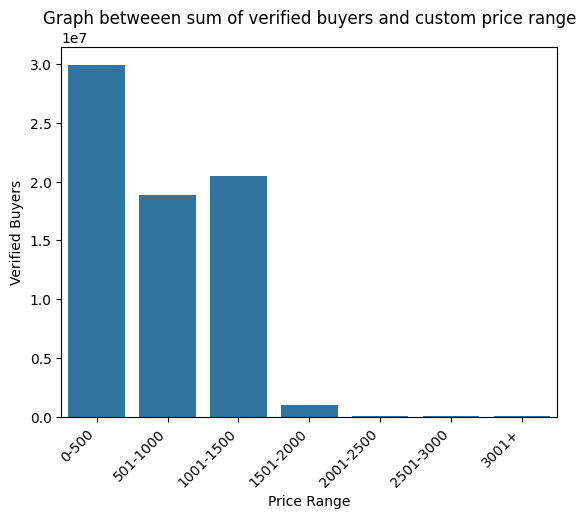

In [48]:
sns.barplot(x=sum_verified_by_price_range['Price Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.title('Graph betweeen sum of verified buyers and custom price range')
plt.xticks(rotation=45, ha = 'right')
plt.show()

CONCLUSION- Here the customers are eager to buy the most affordable cheaper products. While buyers also tend to buy high range products, but diversifying product variety on the lowest price range can really boost sales in the men section

In [49]:
result['Discount'].values

array(['72% OFF', '71% OFF', '55% OFF', ..., '42% OFF', '20% OFF',
       '46% OFF'], dtype=object)

### VERIFIED BUYERS VS DISCOUNT RANGE
#### CREATING CUSTOM DISCOUNT RANGE IN THE BELOW CELL.

In [50]:
def extract_numeric(discount):
    if 'Rs.' in discount:
        return int(discount.replace('Rs. ', '').replace(' OFF', ''))
    elif '%' in discount:
        return int(discount.replace('% OFF', ''))
    return 0

# Extract numeric values from discount column

result['Discount Value'] = result['Discount'].apply(extract_numeric)

# Calculate percentage discount for absolute result
result.loc[result['Discount'].str.contains('Rs.'), 'Discount Percent'] = (
    result['Discount Value'] / result['Product Price'] * 100
)

# Use the original percentage discounts where applicable
result.loc[result['Discount'].str.contains('%'), 'Discount Percent'] = result['Discount Value']

# Round the discount percentages to 2 decimal places for consistency
result['Discount Percent'] = result['Discount Percent'].round(2)

# Define discount bins and labels
discount_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%', '100%+']

# Assign discount range categories
result['Discount Range'] = pd.cut(result['Discount Percent'], bins=discount_bins, labels=discount_labels)




In [51]:
result.head(5) 

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range,Discount Value,Discount Percent,Discount Range
0,Men Slim Fit Shirt,349.0,HIGHLANDER,72% OFF,4.2,17100.0,0-500,72,72.0,71-80%
2,Slim Fit Cotton Casual Shirt,391.0,HIGHLANDER,71% OFF,4.2,1400.0,0-500,71,71.0,71-80%
3,Slim Fit Casual Shirt,1122.0,THE BEAR HOUSE,55% OFF,4.3,5800.0,1001-1500,55,55.0,51-60%
4,Men Slim Fit Casual Shirt,350.0,HIGHLANDER,73% OFF,4.1,5600.0,0-500,73,73.0,71-80%
5,Slim Fit Casual Shirt,391.0,HIGHLANDER,72% OFF,4.1,4500.0,0-500,72,72.0,71-80%


In [52]:
sum_verified_by_price_range['Discount Range'] =  result['Discount Range'].copy()

In [53]:
sum_verified_by_price_range

,Price Range,Verified Buyers,Discount Range
0,0-500,29950808.0,71-80%
1,501-1000,18838506.0,71-80%
2,1001-1500,20444197.0,71-80%
3,1501-2000,1027105.0,51-60%
4,2001-2500,85666.0,71-80%
5,2501-3000,27210.0,71-80%
6,3001+,59233.0,51-60%


We see that 71-80% discount 

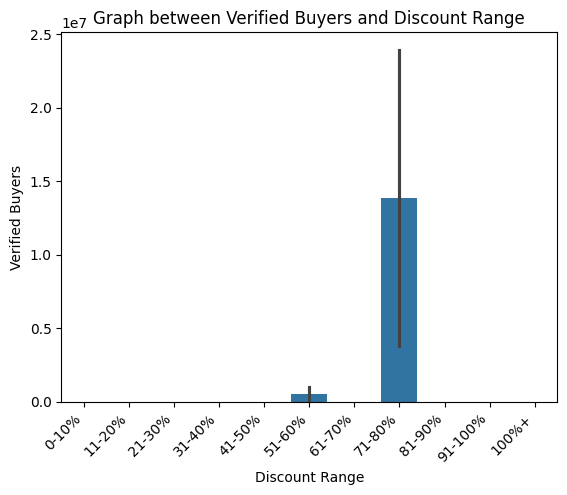

In [54]:
sns.barplot(x=sum_verified_by_price_range['Discount Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers and Discount Range')
plt.show()

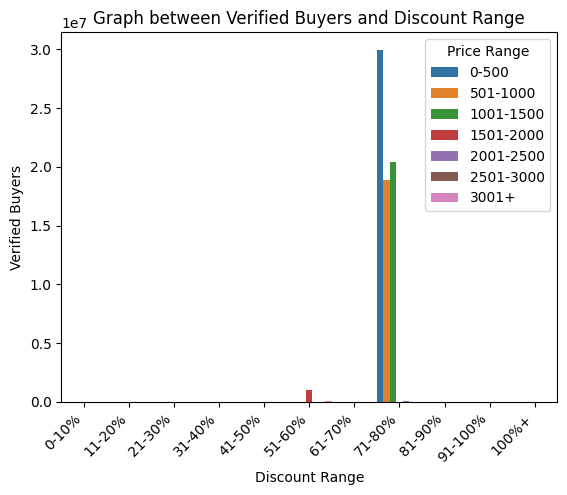

In [55]:
sns.barplot(x='Discount Range',y='Verified Buyers',data= sum_verified_by_price_range,hue=sum_verified_by_price_range['Price Range'],width=1)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers and Discount Range')
plt.show()

We see that irrespective of discount customers prefer to but cheap, affordable products with price ranging from 0 to 1500, where highest sales occurs in products below 500

### VERIFIED BUYERS VS PRODUCT RATING

In [56]:
result[['Product Rating','Discount Range','Price Range']]

,Product Rating,Discount Range,Price Range
0,4.2,71-80%,0-500
2,4.2,71-80%,0-500
3,4.3,51-60%,1001-1500
4,4.1,71-80%,0-500
5,4.1,71-80%,0-500
...,...,...,...
261452,4.3,61-70%,1001-1500
261714,3.5,31-40%,0-500
261715,3.9,41-50%,0-500
261767,4.1,11-20%,0-500


In [57]:
sum_verified_by_product_rating = result.groupby('Product Rating')['Verified Buyers'].sum().reset_index()
print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_product_rating)

Sum of Verified Buyers by Price Range:
    Product Rating  Verified Buyers
0              1.0            123.0
1              1.1              7.0
2              1.2             50.0
3              1.3             20.0
4              1.4              9.0
5              1.5            220.0
6              1.6            147.0
7              1.7             68.0
8              1.8            146.0
9              1.9             67.0
10             2.0            502.0
11             2.1            202.0
12             2.2            395.0
13             2.3            918.0
14             2.4            773.0
15             2.5            839.0
16             2.6           1705.0
17             2.7           2682.0
18             2.8           3678.0
19             2.9           3879.0
20             3.0          43644.0
21             3.1           9916.0
22             3.2           8350.0
23             3.3          29851.0
24             3.4          44398.0
25             3.5       

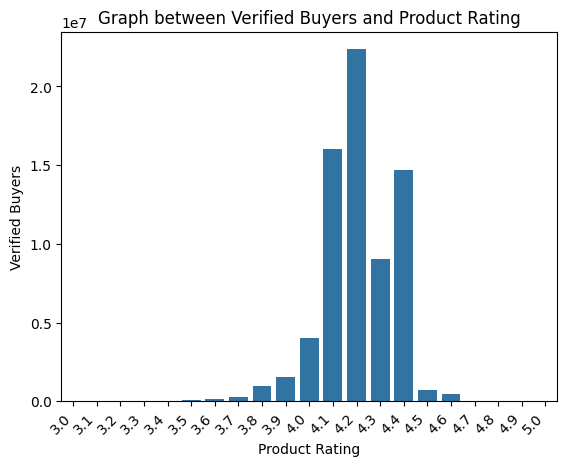

In [58]:
sns.barplot(x=sum_verified_by_product_rating['Product Rating'].iloc[20:],y=sum_verified_by_product_rating['Verified Buyers'].iloc[20:],data= sum_verified_by_product_rating)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers and Product Rating')   
plt.show() 



CONCLUSION - NUMBER OF VERFIED BUYERS(SALES)  IS NOT DIRECTLY PROPORTIONAL TO RATING.  VALUE OF RATING 4.0 TO 4.5 CONSTITUTE THE MAXIMUM NUMBER OF VERIFIED BUYERS.

### FINDING THE TOP 10 POPULAR BRANDS IN THE WOMEN SECTION

In [60]:
sum_verified_by_brands = result.groupby('Product Brand')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_brands)

Sum of Verified Buyers by Price Range:
           Product Brand  Verified Buyers
0         1 Stop Fashion            164.0
1             39 THREADS             13.0
2                   3PIN             55.0
3                    513            879.0
4    7 Alt by Pantaloons            330.0
..                   ...              ...
815              rock.it             35.0
816               t-base            825.0
817           trueBrowns             10.0
818              urSense              4.0
819                 zebu           3024.0

[820 rows x 2 columns]


In [61]:
top_10_brands = sum_verified_by_brands.nlargest(10, 'Verified Buyers')
top_10_brands

,Product Brand,Verified Buyers
350,Jompers,11996529.0
174,DAMENSCH,10764993.0
583,Roadster,8494724.0
576,Red Tape,6995239.0
767,XYXX,5387120.0
409,Levis,3833527.0
196,Dennis Lingo,2558325.0
298,HIGHLANDER,2408551.0
297,HERE&NOW,1570264.0
738,Van Heusen,1564315.0


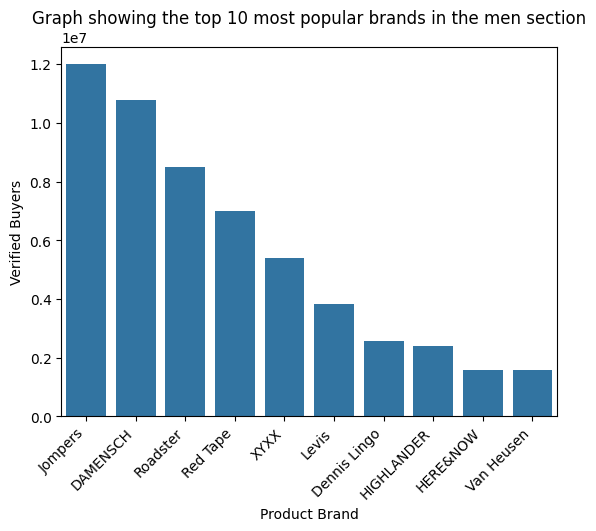

In [62]:
sns.barplot(x=top_10_brands['Product Brand'],y=top_10_brands['Verified Buyers'])
plt.title('Graph showing the top 10 most popular brands in the men section')
plt.xticks(rotation=45,ha='right')
plt.show()

### FINDING THE MOST POPULAR PRODUCTS IN THE WOMEN SECTION

In [63]:
sum_verified_by_product_type = result.groupby('Product Name')['Verified Buyers'].sum().reset_index()
print("Sum of Verified Buyers by Product type:")
print(sum_verified_by_product_type)

Sum of Verified Buyers by Product type:
                       Product Name  Verified Buyers
0      .Typography Printed  T-shirt              9.0
1      1.0 Plus Size Cotton T-shirt              6.0
2       2 Color Logo Cotton T-Shirt             74.0
3       2 Color Logo Cotton T-shirt             73.0
4              2 Color Logo T-shirt             87.0
...                             ...              ...
11621     woven design Cotton Kurta             22.0
11622  x First Mile Running T-shirt              5.0
11623     x Minions Slim Fit Tshirt           1200.0
11624      x RCB Athleisure T-shirt             12.0
11625  x RCB Printed Cotton T-shirt              9.0

[11626 rows x 2 columns]


In [64]:
top_10_products = sum_verified_by_product_type.nlargest(10, 'Verified Buyers')
top_10_products

,Product Name,Verified Buyers
2272,Geometric Pure Cotton Kurta,5115605.0
1274,Cotton Casual Shirt,4040814.0
1963,Embroidered Pure Cotton Kurta,3764993.0
1096,Colourblocked Cotton T-shirt,3392149.0
5935,Men Slim Fit Casual Shirt,2497738.0
242,Anti-Bacterial Innerwear Vest,2410800.0
362,Bamboo Round Neck Slub Vest,2401632.0
7436,Pack Of 2 Solid Cotton Trunks,2084911.0
6064,Men Solid Cotton Trunks,2070000.0
9940,Slim Fit Casual Shirt,1946011.0


After we find the most popular products  using these exploratory analytics techniques,  we can use the ML algorithm  to  find out similar trendy items of these products. The comapny can analyse the product diversity of the similar items and enrich, enhance customer experience by adding more such on-demand clothing. The ML algorithm is shown in trend-myntra-sale.py file.